## Student Name: Sajin Mohamed Pallikkathodi Erathali


## Student ID: 23037601

# Imports

You should not import any further functionality. If you feel this is required to complete the task, please discuss with your moderator.

In [7]:
#!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 753.7 kB/s eta 0:00:00


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# imported to keep track of compute time if you wish
import sys
np.set_printoptions(threshold=sys.maxsize)
import time

In [9]:
from skopt.utils import use_named_args
from skopt import gp_minimize
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import confusion_matrix
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve

# Provided code
The below code is not necessarily complete or applicable to all tasks. Read and understand the code so that you can use wisely and adapt as required.

In [70]:
def plot_margin(X, y, clf, title):

    # increasing the figure size for bette display
    plt.figure(figsize=(8,8))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)


    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    # calling show with names
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

To compare the SVM with a NN:

In [54]:
def plot_decisions(X, y, title, model):
    # define bounds of the domain
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    # make predictions for the grid
    yhat = model.predict(grid)
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap='Paired')
    plt.title(title)
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
    plt.show()

In [55]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    plt.title(title)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_errors = 1- train_scores
    test_errors = 1-test_scores

    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Test error")


    plt.legend(loc="best")
    return plt

This wrapper is required in below BayesSearchCV for a neural network to combine the two layer arguments (or more if you wish to experiment with more than two layers) into the single hidden_layer_sizes hyper-parameter.

In [94]:
class MLPWrapper(BaseEstimator, ClassifierMixin):

    def __init__(self, layer1=10, layer2=10):
        self.layer1 = layer1
        self.layer2 = layer2

    def fit(self, X, y):
        model = MLPClassifier(
            hidden_layer_sizes=[self.layer1, self.layer2],
            max_iter = 1000,
        )
        model.fit(X, y)
        self.model = model
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        return self.model.score(X, y)

In [93]:
# Example use of BayesSearchCV to search a large search space whilst keeping compute requirements in check

optSVM1_lin = BayesSearchCV(
    svm.SVC(),
    {
      'C': Real(1e-3, 1e+3, prior='log-uniform'),
        'kernel': Categorical(['linear']),
    },
    n_iter=100,
)

In [95]:
# Example use of BayesSearchCV with the MLPWrapper to vary the layer sizes

optNN1 = BayesSearchCV(
    estimator=MLPWrapper(),
    search_spaces={
        'layer1': Integer(1, 100),
        'layer2': Integer(1, 100)
    },
    n_iter=100,
)

# Solutions

## Task 1

## Import training data

In [16]:
import pandas as pd
df = pd.read_csv("dataset_1_train.csv", header = None)
display(df) # display the dataframe

X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

,0,1,2
0,0.913385,-0.131071,1.0
1,-1.393895,-1.373790,0.0
2,-0.379568,1.404829,0.0
3,1.525722,-1.713379,1.0
4,1.444181,-0.622548,1.0
...,...,...,...
996,-1.247179,-1.562549,0.0
997,0.272633,0.020601,1.0
998,-0.222179,1.051096,0.0
999,0.758902,-1.624465,1.0


## Train the model

In [56]:
model = svm.SVC(kernel = "linear", C = 0.001, random_state = 42)
# as mentioned in the question using the entire X for training
model = model.fit(X, y)

## Describe accuracy vs C_values

In [57]:
def accuracy_vs_c_values(X, y, c_values = np.linspace(0.0000001, 0.25, num = 5)):

  for c in c_values :

    model = svm.SVC(kernel = "linear", C = c, random_state = 42)
    model = model.fit(X, y)
    accuracy = model.score(X, y)
    print(f"C value : {c}, accuracy = {accuracy}" )
    # plot_learning_curve(model, f"SVM with C = {c} with accuracy value of {accuracy}", X, y).show()
    # plot_decisions(X.values, y.values, f"SVM with C = {c} with accuracy value of {accuracy}", model)
    # plot_margin(X, y, model)


In [58]:
accuracy_vs_c_values(X, y)

C value : 1e-07, accuracy = 0.5004995004995005
C value : 0.062500075, accuracy = 0.999000999000999
C value : 0.12500005, accuracy = 1.0
C value : 0.18750002500000001, accuracy = 1.0
C value : 0.25, accuracy = 1.0


<span style = "color:green">This tells us as the C value increases the accuracy increases</span>

## Plotting soft margin and hard margin using a lower c value and a high c value

### Define function of plotting the various graphs

In [80]:

def train_model_and_plot(type_of):
  model = svm.SVC(kernel = "linear", C = c_value, random_state = 42)
  model = model.fit(X, y)
  accuracy = model.score(X, y)
  print(f"C value : {c_value}, accuracy = {accuracy}" )
  plot_learning_curve(model, f"SVM with C = {c_value} with accuracy value of {accuracy}", X, y).show()
  plot_decisions(X.values, y.values, f"SVM with C = {c_value} with accuracy value of {accuracy}", model)
  plot_margin(X.values, y, model, f"{type_of} (c = {c_value})")
  print("Number of Support vectors :", len(model.support_vectors_))

### Soft Margin(low c value)

C value : 0.001, accuracy = 0.998001998001998


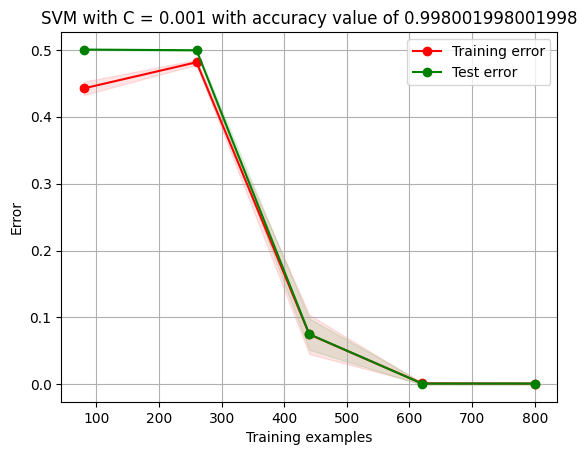

<ipython-input-54-61982e9b3f8a>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


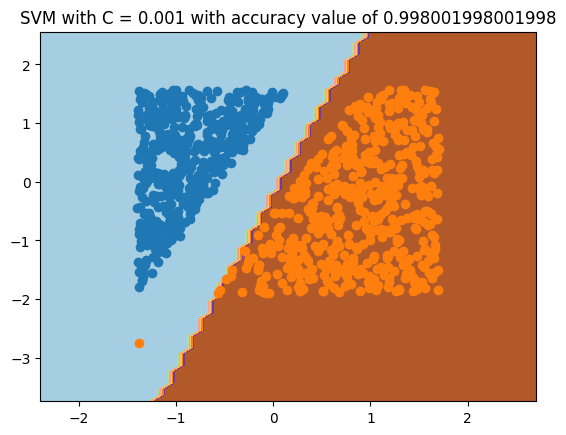

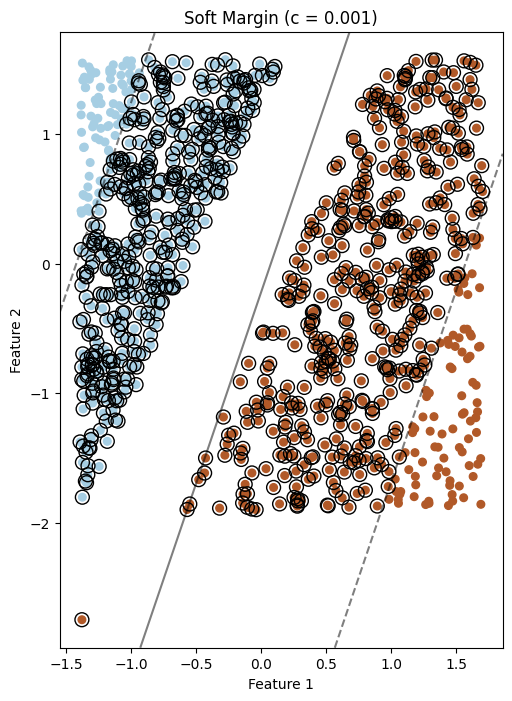

Number of Support vectors : 832


In [81]:
c_value = 0.001
train_model_and_plot("Soft Margin")

<span style = "color:green">The above figures and plots tell us that the lower the c value, higher the gap beween the support vectors. As can be seen when the c value is 0.001 then the accuracy is 0.998, and the gap between the support vectors is large, which tells us the number of support vectors is also large(832 in this case)</span>

### Hard Margin

C value : 100, accuracy = 1.0


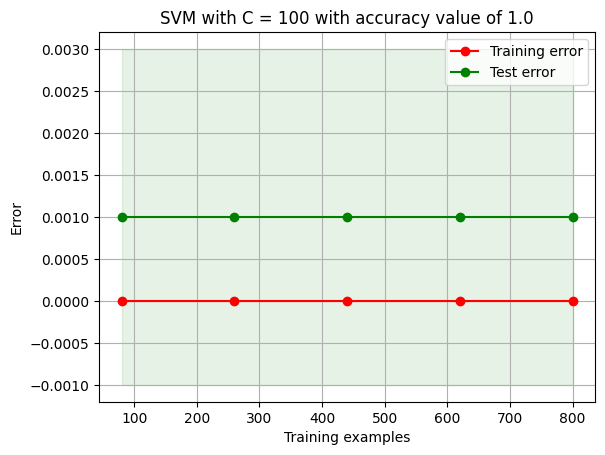

<ipython-input-54-61982e9b3f8a>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


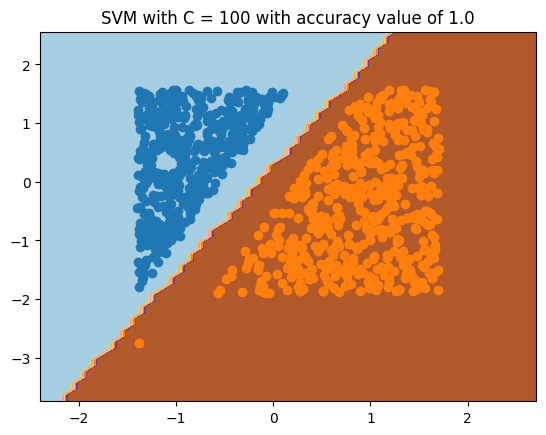

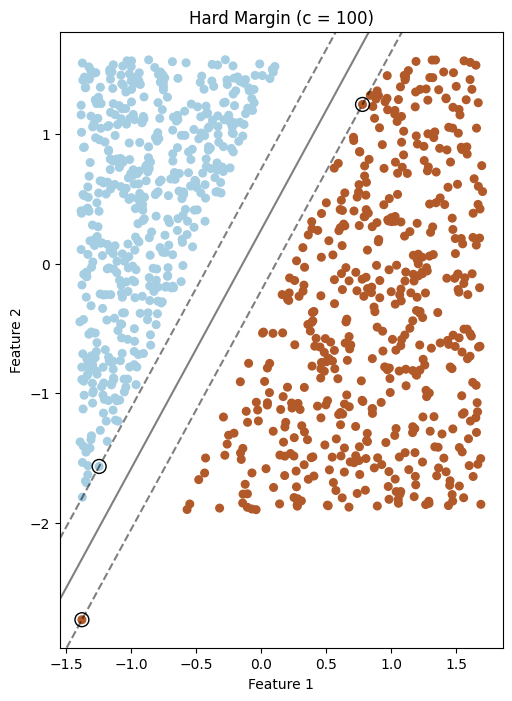

Number of Support vectors : 3


In [82]:
c_value = 100
train_model_and_plot("Hard Margin")

<span style = "color:green">The above figures and plots tell us that the higher the c value, lower the gap beween the support vectors. As can be seen when the c value is 100 then the accuracy is 1, and the gap between the support vectors is small, which tells us the number of support vectors is also small(3 in this case)</span>

## Reflection

<span style = "color:green">The target of Support Vector Machine is to \frac{2}{\|w\|} term, which is done by minimizing wTw/2 with the condition y(wT.x + b) >=1. This quadratic constrained optimization can be solved using Lagrange multipliers. For an ideal solution many of the multipliers would be 0. The non-zero multipliers would determine the support vectors, which would be corresponding to the points on the margins, which are defined as support vectors. This maximize the gap between the vectors. The Number of support vectors determine the gap we have in between the support vectors.</span>

<span style = "color:green">The targer here is to obtain a bigger margin as it would generalize well to out-of-sample data. Hence we prefer the soft margin. For a soft margin classifier, the in-sample error would be bigger when compared to the hard margin classifer, due to the fact that it allows for a more generalized boundary. Hence reducing the value of C increases the margin. This can be viewed as a method of regularization similar to lambdas, however opposite. ie. C = 1/lambda. Increase in C would lead to lowering of regularizaion hence would form a hard margin, and decreasing C would lead to higher regularization, whereby the model performs better for out-of-sample data, due to better generalization.</span>

# Task 2

## Dataset 2

In [198]:
import pandas as pd

def load_data_dataset(train_data, test_data):
  # load data
  df_train = pd.read_csv(train_data, header = None)
  df_test = pd.read_csv(test_data, header = None)
  # display(df) # display the dataframe
  return df_train, df_test

def load_train_test_data(df_train, df_test):
  X_train = df_train.iloc[:, 0:2]
  y_train = df_train.iloc[:, -1]
  X_test = df_test.iloc[:, 0:2]
  y_test = df_test.iloc[:, -1]
  return X_train, y_train, X_test, y_test

In [199]:
df_train, df_test = load_data_dataset("dataset_2_train.csv", "dataset_2_test.csv")
X_train, y_train, X_test, y_test = load_train_test_data(df_train, df_test)

In [ ]:
# X_train = X_train**2

<span style = "color:green">Testing a few SVMs with different Kernels</span>

## Testing wiht poly kernel with degree 2

<ipython-input-54-61982e9b3f8a>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


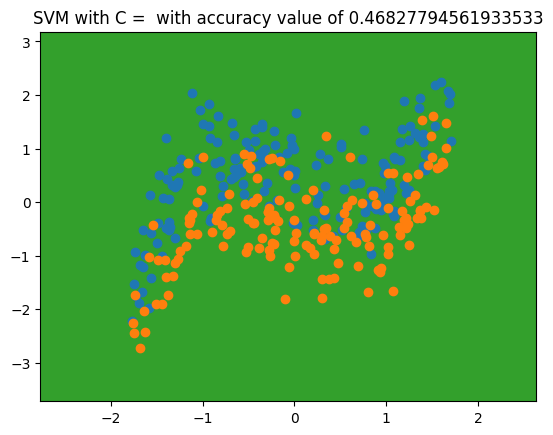

In [200]:
model = svm.SVC(kernel = "poly", degree = 2, random_state = 42)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
plot_decisions(X_test.values, y_test, f"SVM with C =  with accuracy value of {accuracy}", model)
print()


## Testing with rbf kernel

<ipython-input-54-61982e9b3f8a>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


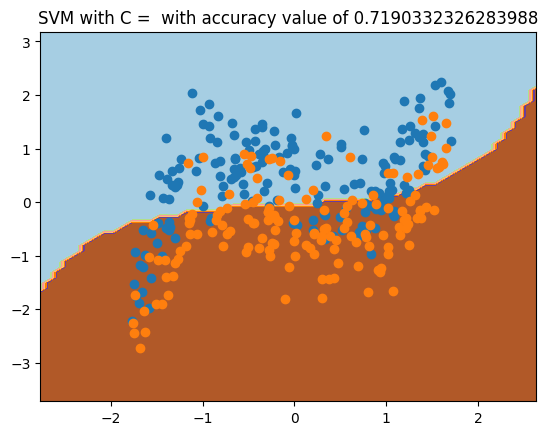

In [88]:
model = svm.SVC(kernel='rbf', C=0.9, gamma=0.1, random_state=42)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
plot_decisions(X_test.values, y_test, f"SVM with C =  with accuracy value of {accuracy}", model)
print()


## Testing with Sigmoid Kernel

<ipython-input-54-61982e9b3f8a>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


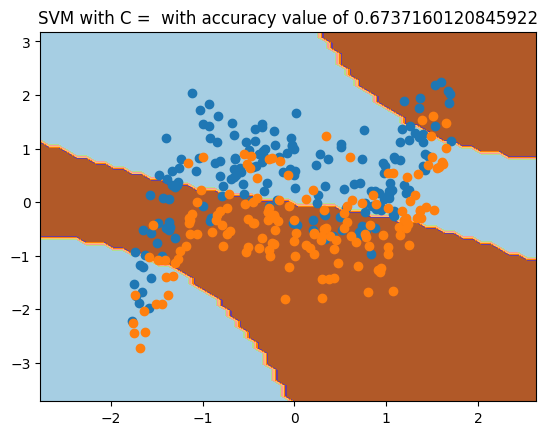

In [89]:
model = svm.SVC(kernel='sigmoid', C=1.0, gamma='auto', coef0=0.0, random_state=42)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
plot_decisions(X_test.values, y_test, f"SVM with C =  with accuracy value of {accuracy}", model)
print()


## Getting the optimal model parameters for Dataset 2 using Grid Search CV

In [201]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

parameter_grid = [
    {'C': [0.0001, 0.001, 0.01, 0.1, 10, 100], 'kernel': ['linear']},
    {'C': [0.0001, 0.001, 0.01, 0.1, 10, 100], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']},
    {'C': [0.0001, 0.001, 0.01, 0.1, 10, 100], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['poly'], 'degree':[2,3,4]}]

model = SVC()

grid_search = GridSearchCV(model, parameter_grid, cv = 5)
grid_search.fit(X_train, y_train)

# identify the best parameters
best_params = grid_search.best_params_

print("The best parameters are :", best_params)

# use the best_estimator_ to obtain the best model and predict the result
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# calculate the accuracy and print the classification report
# print(f"Accuracy of Dataset 2 with {best_params['kernel']} kernel with gamma value of {best_params['gamma']} and degree of {best_params['degree']} and C value of {best_params['C']} is :", accuracy)
print(f"Accuracy of Dataset 2 with {best_params['kernel']} kernel with gamma value of {best_params['gamma']} and C value of {best_params['C']} is :", accuracy)


The best parameters are : {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy of Dataset 2 with rbf kernel with gamma value of 0.1 and C value of 100 is : 0.7643504531722054


# Plot decision boundary and margins with learning curve

In [204]:
def plot_learning_curve_decision_boundary_margin(best_params, X_test, y_test, accuracy, best_estimator, dataset_title):
  # plot learning curve for the best estimator
  plot_learning_curve(best_estimator, f"SVM with C = {best_params['C']} with accuracy value of {accuracy}", X_test, y_test).show()
  # plot decision boundary
  plot_decisions(X_test.values, y_test.values, f"SVM with C = {best_params['C']} with accuracy value of {accuracy}", best_estimator)
  # plot margin for dataset
  plot_margin(X_test.values, y_test.values, best_estimator, f"Margin for {dataset_title}")
  # Total number of support vectors
  print("Number of support vectors : ", len(best_estimator.support_vectors_))

## Plot learning curve, decision boundary and margin for Dataset 2

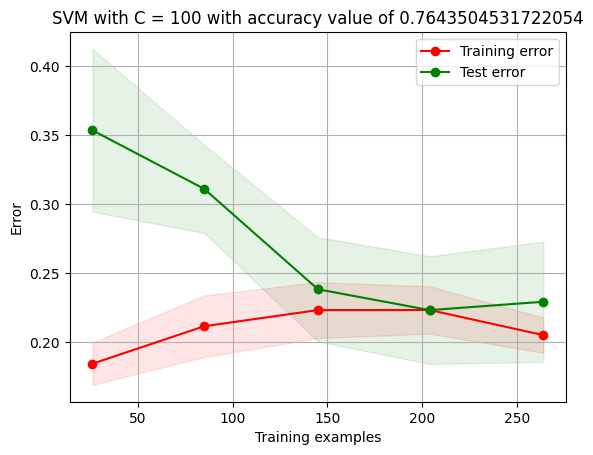

<ipython-input-54-61982e9b3f8a>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


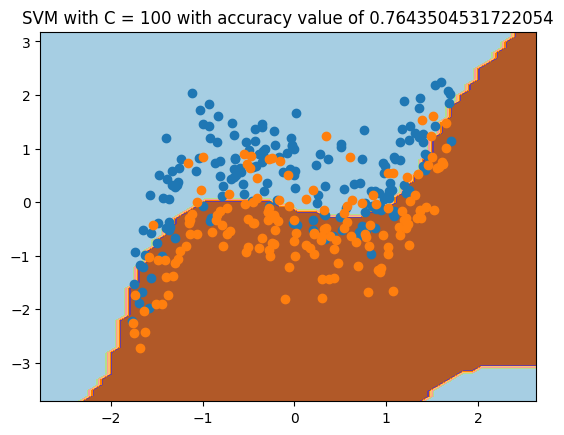

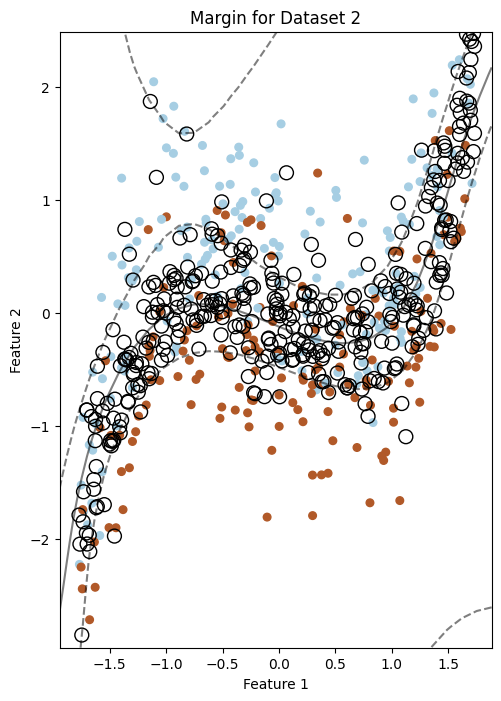

Number of support vectors :  370


In [205]:
plot_learning_curve_decision_boundary_margin(best_params, X_test, y_test, accuracy, best_estimator, "Dataset 2")

# Dataset 3

In [206]:
df_train, df_test = load_data_dataset("dataset_3_train.csv", "dataset_3_test.csv")
X_train, y_train, X_test, y_test = load_train_test_data(df_train, df_test)

In [207]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

parameter_grid = [
    {'C': [0.0001, 0.001, 0.01, 0.1, 10, 100], 'kernel': ['linear']},
    {'C': [0.0001, 0.001, 0.01, 0.1, 10, 100], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']},
    {'C': [0.0001, 0.001, 0.01, 0.1, 10, 100], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['poly'], 'degree':[2,3,4]}]

model = SVC()

grid_search = GridSearchCV(model, parameter_grid, cv = 5)
grid_search.fit(X_train, y_train)

# identify the best parameters
best_params = grid_search.best_params_

print("The best parameters are :", best_params)

# use the best_estimator_ to obtain the best model and predict the result
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# calculate the accuracy and print the classification report
print(f"Accuracy of Dataset 3 with {best_params['kernel']} kernel with gamma value of {best_params['gamma']} and degree of {best_params['degree']} and C value of {best_params['C']} is :", accuracy)
# print(f"Accuracy of Dataset 2 with {best_params['kernel']} kernel with gamma value of {best_params['gamma']} and C value of {best_params['C']} is :", accuracy)


The best parameters are : {'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Accuracy of Dataset 3 with poly kernel with gamma value of 0.1 and degree of 2 and C value of 100 is : 0.9636363636363636


## Plot learning curve, decision boundary and margin for Dataset 3

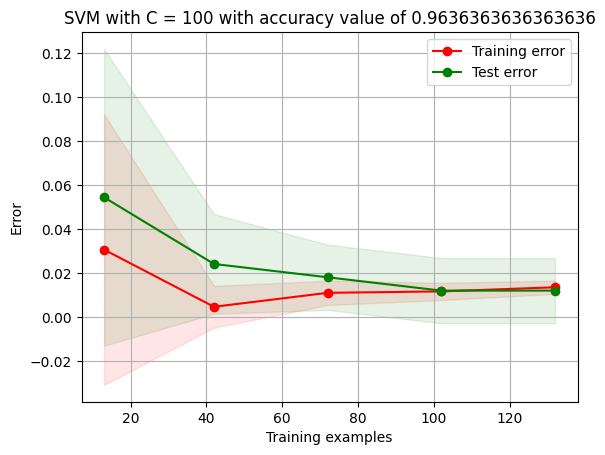

<ipython-input-54-61982e9b3f8a>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


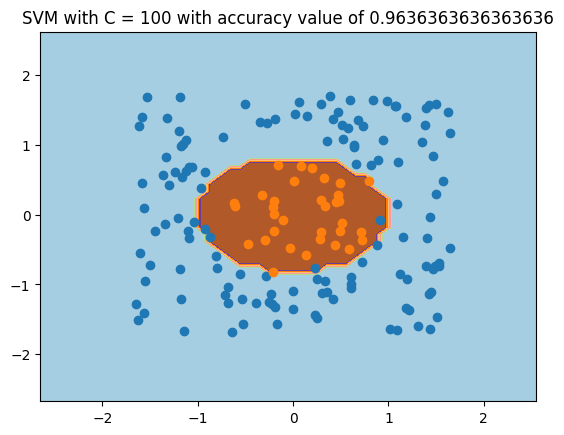

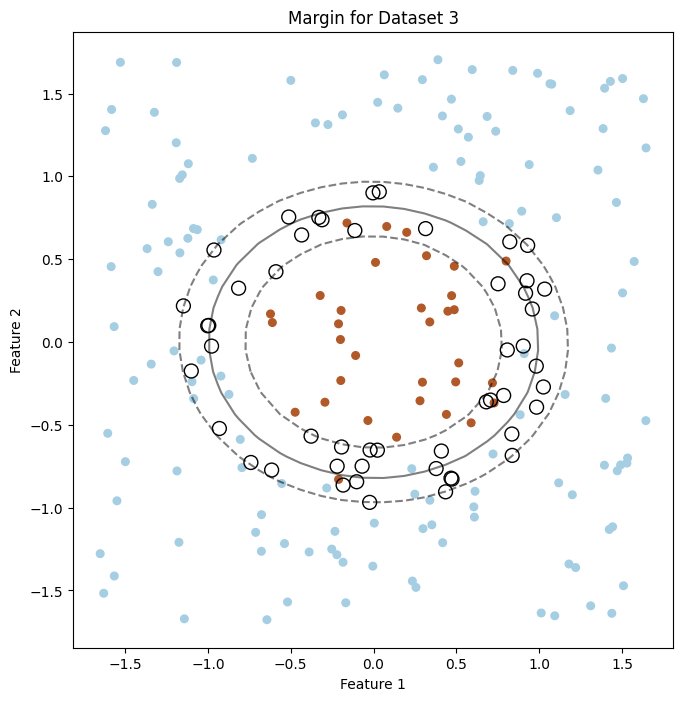

Number of support vectors :  50


In [208]:
plot_learning_curve_decision_boundary_margin(best_params, X_test, y_test, accuracy, best_estimator, "Dataset 3")

## Neural Network Model

## Load data for Dataset 2

In [235]:
df_train, df_test = load_data_dataset("dataset_2_train.csv", "dataset_2_test.csv")
X_train, y_train, X_test, y_test = load_train_test_data(df_train, df_test)

## Train MLPClassifier

In [236]:
def train_MLPClassifier(X_train, y_train):
  # using MLPClassifier
  clf = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', alpha = 0.1)
  # fit the model to train data
  clf.fit(X_train, y_train)
  return clf

## Predict for test data

In [237]:
def predict_for_test_data(clf, X_test):
  # predict for the test data
  y_pred = clf.predict(X_test)
  return y_pred

## Calculate Accuracy

In [238]:
def calculate_accuracy_score(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy using MLP Classifier :", accuracy)
  return accuracy

In [239]:
# train MLPClassifier using train data
clf = train_MLPClassifier(X_train, y_train)
# predict for test data
y_pred = predict_for_test_data(clf, X_test)
# print accuracy score
accuracy = calculate_accuracy_score(y_test, y_pred)

Accuracy using MLP Classifier : 0.7643504531722054


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [240]:
def plot_learning_curve_decision_boundary(X_test, y_test, clf, accuracy):
  # plot learning curve for the best estimator
  plot_learning_curve(clf, f"MLP Classifier with accuracy value of {accuracy}", X_test, y_test).show()
  # plot decision boundary
  plot_decisions(X_test.values, y_test.values, f"MLP Classifier with accuracy value of {accuracy}", clf)
  # plot margin for dataset 2
  # plot_margin(X_test.values, y_test.values, clf, "Margin for Dataset 2 using MLP Classifier")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

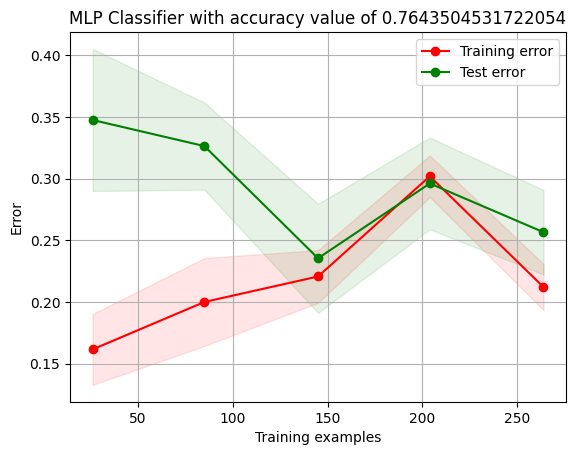

<ipython-input-54-61982e9b3f8a>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


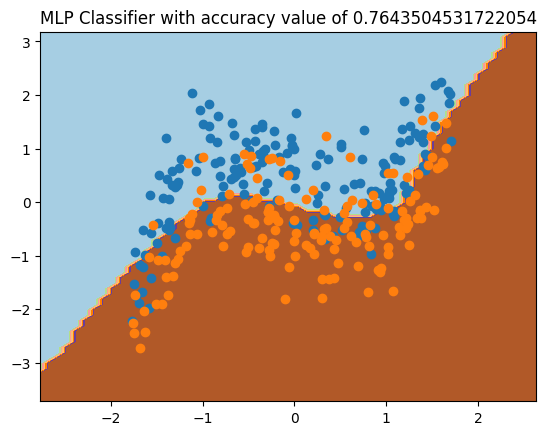

In [241]:
plot_learning_curve_decision_boundary(X_test, y_test, clf, accuracy)

## Load data for Dataset 3

In [242]:
df_train, df_test = load_data_dataset("dataset_3_train.csv", "dataset_3_test.csv")
X_train, y_train, X_test, y_test = load_train_test_data(df_train, df_test)

## Train and predict data

In [245]:
# train MLPClassifier using train data
clf = train_MLPClassifier(X_train, y_train)
# predict for test data
y_pred = predict_for_test_data(clf, X_test)
# print accuracy score
accuracy = calculate_accuracy_score(y_test, y_pred)

Accuracy using MLP Classifier : 0.9757575757575757


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

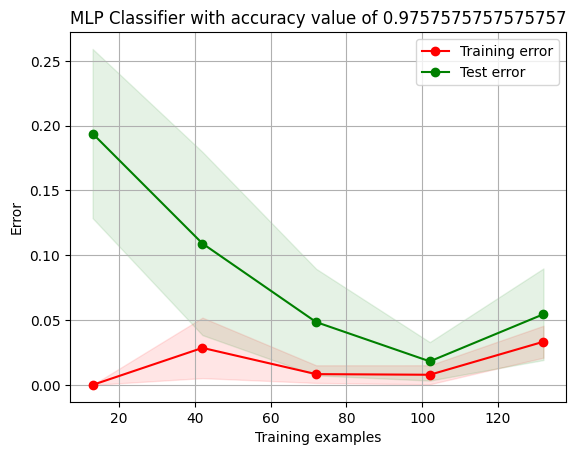

<ipython-input-54-61982e9b3f8a>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


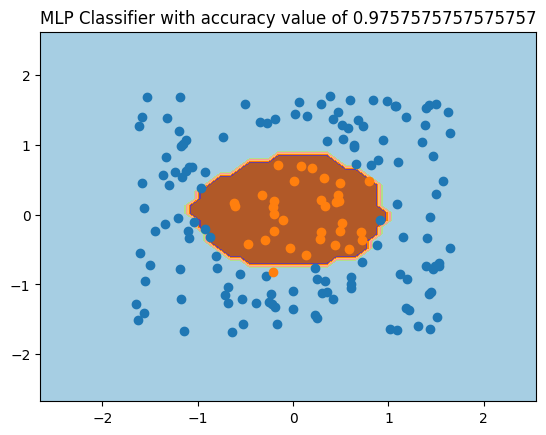

In [246]:
plot_learning_curve_decision_boundary(X_test, y_test, clf, accuracy)

In [ ]:
# c = [0.9,0.8]

# X = df_train.iloc[:, 0:2]
# y = df_train.iloc[:, -1]
# plot_decision_boundary_learning_curve(X**2,y)

## Reflection
